<a href="https://colab.research.google.com/github/siriusbluecarter/PRODIGY_ML_02/blob/main/k_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [4]:
df=pd.read_csv('/content/Mall_Customers.csv')

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.shape

(200, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
df.drop(["CustomerID"],axis=1,inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


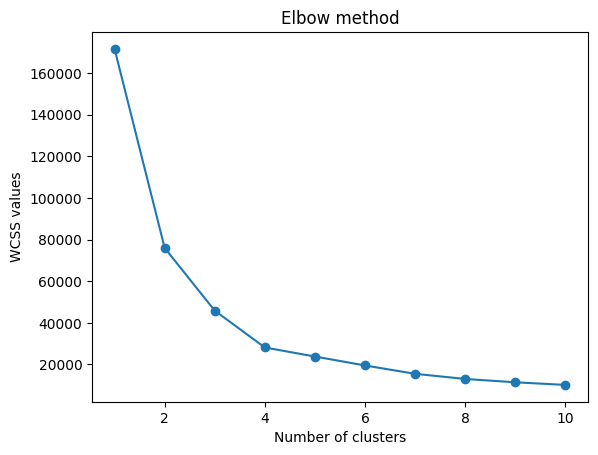

In [10]:
X1=df.loc[:,['Age','Spending Score (1-100)']].values
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++')
  kmeans.fit(X1)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS values')
plt.show()

In [11]:
# Perform K-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=4)
label=kmeans.fit_predict(X1)
print(label)


[3 2 1 2 3 2 1 2 1 2 1 2 1 2 1 2 3 3 1 2 3 2 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1
 2 1 2 0 2 0 3 1 3 0 3 3 3 0 3 3 0 0 0 0 0 3 0 0 3 0 0 0 3 0 0 3 3 0 0 0 0
 0 3 0 3 3 0 0 3 0 0 3 0 0 3 3 0 0 3 0 3 3 3 0 3 0 3 3 0 0 3 0 3 0 0 0 0 0
 3 3 3 3 3 0 0 0 0 3 3 3 2 3 2 0 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2 3 2 1 2 0 2
 1 2 1 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1 2 1 2 1 2 3
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


In [12]:
print(kmeans.cluster_centers_)

[[55.70833333 48.22916667]
 [43.29166667 15.02083333]
 [30.1754386  82.35087719]
 [27.61702128 49.14893617]]


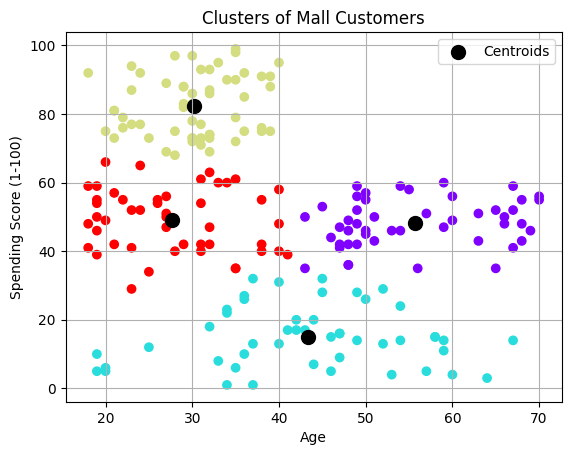

In [13]:
plt.scatter(X1[:,0],X1[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],s=100, c='Black', label='Centroids')
plt.title('Clusters of Mall Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.legend()
plt.show()



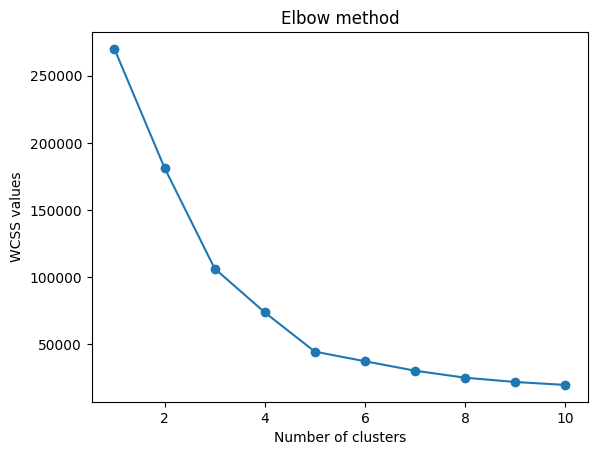

In [14]:
X2=df.loc[:,['Annual Income (k$)','Spending Score (1-100)']].values
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++')
  kmeans.fit(X2)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS values')
plt.show()

In [15]:
# Perform K-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=5)
label=kmeans.fit_predict(X2)
print(label)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 4 3 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 2 1 2 4 2 1 2 1 2 4 2 1 2 1 2 1 2 1 2 4 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


In [16]:
print(kmeans.cluster_centers_)

[[25.72727273 79.36363636]
 [88.2        17.11428571]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]
 [55.2962963  49.51851852]]


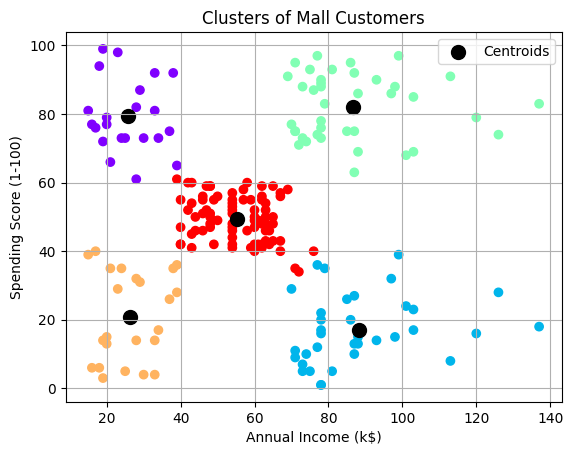

In [17]:
plt.scatter(X2[:,0],X2[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],s=100, c='Black', label='Centroids')
plt.title('Clusters of Mall Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.legend()
plt.show()

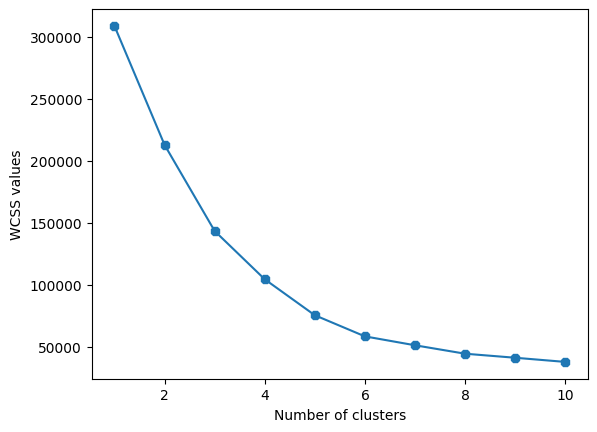

In [18]:
X3=df.iloc[:,1:]
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++')
  kmeans.fit(X3)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,marker='8')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS values')
plt.show()

In [19]:
# Perform K-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=5)
label=kmeans.fit_predict(X3)
print(label)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 3 0 1 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 1 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0]


In [20]:
print(kmeans.cluster_centers_)

[[32.69230769 86.53846154 82.12820513]
 [43.08860759 55.29113924 49.56962025]
 [25.52173913 26.30434783 78.56521739]
 [40.66666667 87.75       17.58333333]
 [45.2173913  26.30434783 20.91304348]]


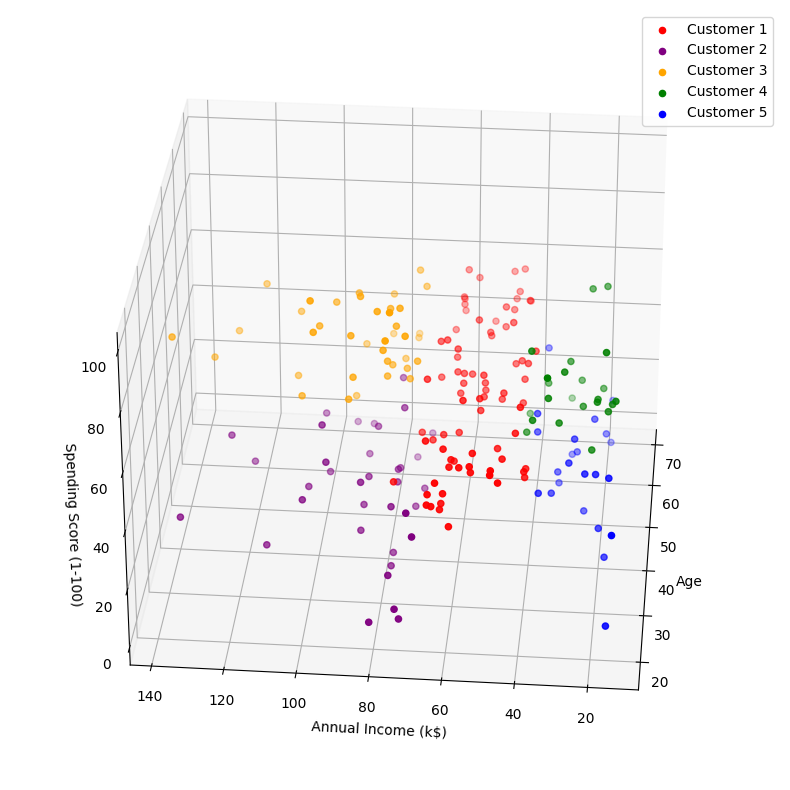

In [21]:
clusters=kmeans.fit_predict(X3)
df["label"]=clusters
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'purple', 'orange', 'green', 'blue']

for cluster_label, color in zip(range(5), colors):
    ax.scatter(df.Age[df.label == cluster_label],
               df["Annual Income (k$)"][df.label == cluster_label],
               df["Spending Score (1-100)"][df.label == cluster_label],
               c=color, label=f'Customer {cluster_label + 1}')

ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")
plt.grid('True')
plt.legend()
plt.show()
